<a href="https://colab.research.google.com/github/ealsk/2020_AI/blob/master/10_2_AND_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tf.__version__

'2.2.0'

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [ ]:
x_data = [[0, 0],
          [0, 1], 
          [1, 0],
          [1, 1]]

# AND-gate
y_data = [[0],
          [0],
          [0],
          [1]]
          
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost = []

In [ ]:
for step in range(10001):

  cost1, _= sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
  vcost.append(cost1)
  if step %1000 ==0:
      print(cost1)

0.8060372
0.4989797
0.38396674
0.31524852
0.26907268
0.23547176
0.20967394
0.18911135
0.17226794
0.15818189
0.14620817


Text(0.5, 0, 'epoch')

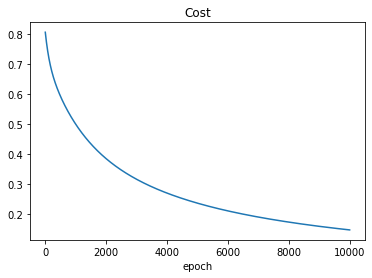

In [ ]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})
print(test1[0][0])

0.7823792


In [ ]:
for i in range(4):
 test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
 print(i, x_data[i], y_data[i] , '---- predicted : ',test1 )

0 [0. 0.] [0.] ---- predicted :  [[0.00889718]]
1 [0. 1.] [0.] ---- predicted :  [[0.15271446]]
2 [1. 0.] [0.] ---- predicted :  [[0.15186726]]
3 [1. 1.] [1.] ---- predicted :  [[0.7823792]]


In [ ]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y:y_data})
print(acc1)

1.0


In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})
print(test1[0][0])

0.011964458
